In [1]:
import pandas as pd
import sklearn.linear_model as sklin
import sklearn.model_selection as skmod
import sklearn.pipeline as skpip
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn.preprocessing as skpre

### step 1. 다항회귀

In [2]:
import pandas as pd
data=pd.read_csv(r"C:\Users\SAMSUNG\Desktop\공부파일들\데이콘\서울시 기후예측\train.csv")
nan_data=data.copy()
nan_data.dropna(axis=0,inplace=True)
nan_data["일시"]=nan_data["일시"].apply(pd.to_datetime)

다항식 만들기

In [22]:
degree=3
poly_model=skpre.PolynomialFeatures(degree=degree,interaction_only=True,include_bias=False) #interaction_only=True이므로 거듭제곱꼴은 사라짐
poly_data=pd.DataFrame(poly_model.fit_transform(X=nan_data[nan_data.columns.difference(["일시","평균기온"])])
                       ,columns=poly_model.get_feature_names_out())

In [31]:
linear_model=sklin.LinearRegression(n_jobs=3)

### step2. 학습곡선

In [32]:
import numpy as np

In [34]:
train_size,train_score,valid_score=skmod.learning_curve(estimator=linear_model,X=poly_data,y=nan_data["평균기온"]
                                                        ,train_sizes=np.linspace(0.01,1,40),cv=3,
                                                        scoring="neg_root_mean_squared_error")

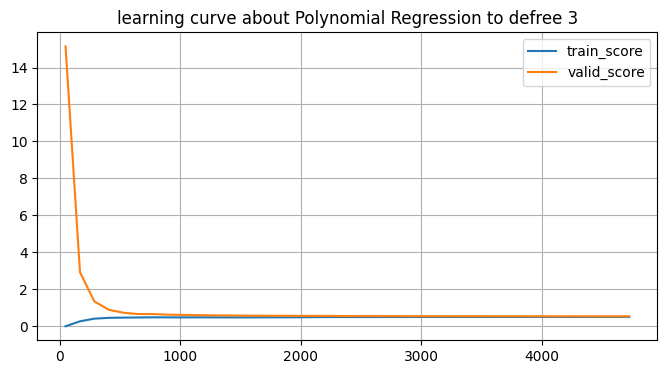

In [38]:
plt.figure(figsize=(8,4))
plt.title("learning curve about Polynomial Regression to defree 3")
sb.lineplot(x=train_size,y=-train_score.mean(axis=1),label="train_score")
sb.lineplot(x=train_size,y=-valid_score.mean(axis=1),label="valid_score")
plt.grid()
plt.show()

In [39]:
nan_data["평균기온"].describe()

count    7089.000000
mean       14.173198
std         9.988532
min       -11.600000
25%         5.500000
50%        16.200000
75%        23.000000
max        31.700000
Name: 평균기온, dtype: float64

In [47]:
# 10차 다항회귀는 어떨까
poly_model=skpip.make_pipeline(skpre.PolynomialFeatures(degree=5,include_bias=False,interaction_only=True),
                               sklin.LinearRegression(n_jobs=3))
train_size,train_score,valid_score=skmod.learning_curve(estimator=poly_model
                                                        ,X=nan_data[nan_data.columns.difference(["일시","평균기온"])]
                                                        ,y=nan_data["평균기온"]
                                                        ,cv=3,
                                                        train_sizes=np.linspace(0.01,1,40)
                                                        )


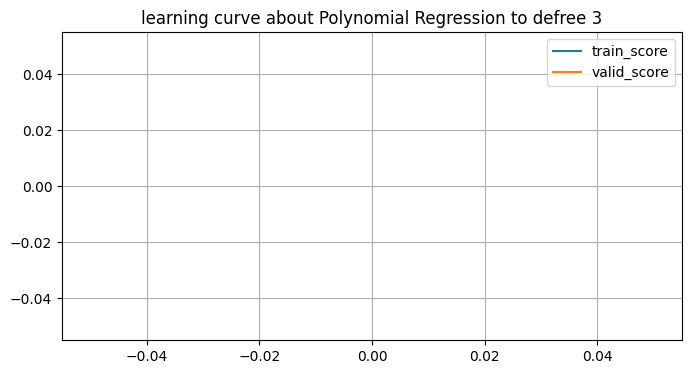

In [ ]:
plt.figure(figsize=(8,4))
plt.title("learning curve about Polynomial Regression to defree 3")
sb.lineplot(x=train_size,y=-train_score.mean(axis=1),label="train_score")
sb.lineplot(x=train_size,y=-valid_score.mean(axis=1),label="valid_score")
plt.grid()
plt.show()